泰勒图已保存至：model compare\taylor_diagram.png


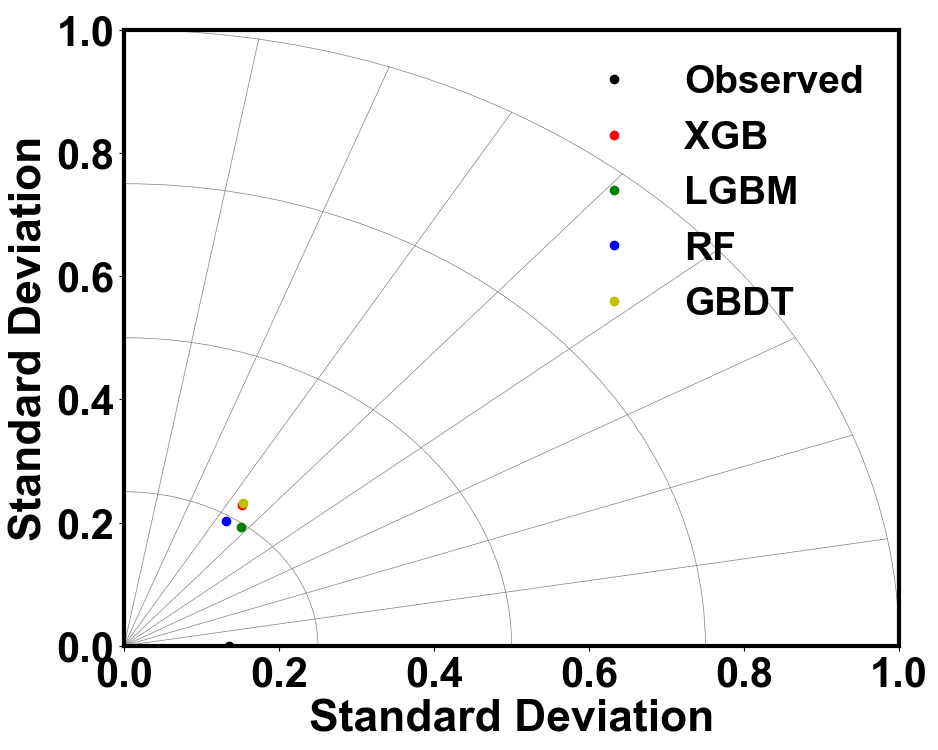

In [4]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, mean_squared_error,
    r2_score, confusion_matrix, mean_absolute_error
)
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split
import joblib
import os
import matplotlib as mpl
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import mpl_toolkits.axisartist.grid_finder as grid_finder
import warnings

warnings.filterwarnings('ignore')

# ==================== 参数配置 ====================
# 模型文件路径
MODEL_PATHS = {
    'XGBoost': 'xgboost_model_ncv/xgboost_model.pkl',
    'LightGBM': 'lgbm_model_ncv/lgbm_model.pkl',  # 请替换为实际路径
    'Random Forest': 'rf_model_ncv/rf_model.pkl',  # 请替换为实际路径
    'GBDT': 'gbdt_model_ncv/gbdt_model.pkl'  # 新增GBDT模型路径，请替换为实际路径
}

# 数据路径
DATA_PATH = "归一化数据.xlsx"
TARGET_COLUMN = "SO2 tolerance"
OUTPUT_DIR = "model compare"
RANDOM_STATE = 42

# 横纵坐标范围设置
X_MIN = 0
X_MAX = 1  # 调整为1
Y_MIN = 0
Y_MAX = 1  # 调整为1

# 假设已经加载好数据和划分好训练集、测试集等，这里简单模拟实际观测值和各模型预测值
# 实际使用中请根据真实情况替换这些数据获取逻辑
np.random.seed(RANDOM_STATE)
n_samples = 100
observed_values = np.random.normal(0.5, 0.15, n_samples)  # 调整模拟数据范围
xgb_predicted_values = np.random.normal(0.55, 0.16, n_samples)  # 调整模拟数据范围
lgbm_predicted_values = np.random.normal(0.49, 0.14, n_samples)  # 调整模拟数据范围
rf_predicted_values = np.random.normal(0.51, 0.15, n_samples)  # 调整模拟数据范围
gbdt_predicted_values = np.random.normal(0.47, 0.145, n_samples)  # 调整模拟数据范围


def taylor_diagram(ax, observed, predictions, model_names):
    """
    绘制泰勒图
    :param ax: 绘图坐标轴对象
    :param observed: 实际观测值
    :param predictions: 各模型预测值列表，每个元素为对应模型预测值数组
    :param model_names: 各模型名称列表
    """
    obs_mean = np.mean(observed)
    obs_std = np.std(observed)
    obs_corr = 1  # 自身相关性为1

    ax.set_xlim(X_MIN, X_MAX)
    ax.set_ylim(Y_MIN, Y_MAX)

    # 绘制同心圆（标准差）
    circles = []
    for i in range(1, 5):  # 调整同心圆数量，适应范围0-1
        circle = plt.Circle((0, 0), i * 0.25, color='gray', fill=False, lw=0.5)
        ax.add_patch(circle)
        circles.append(circle)

    # 绘制放射状线（相关性）
    for i in range(0, 101, 10):
        angle = np.deg2rad(i)
        ax.plot([0, X_MAX * np.cos(angle)], [0, X_MAX * np.sin(angle)], color='gray', lw=0.5)

    # 计算各模型的标准差和相关性
    stds = []
    corrs = []
    for pred in predictions:
        std = np.std(pred)
        corr = np.corrcoef(observed, pred)[0, 1]
        stds.append(std)
        corrs.append(corr)

    # 绘制观测点
    ax.plot(obs_std, 0, 'ko', label='Observed')

    # 绘制各模型点
    colors = ['r', 'g', 'b', 'y']  # 简单设置颜色，可根据需要调整
    for i, (std, corr) in enumerate(zip(stds, corrs)):
        x = std
        y = np.sqrt(2 * (1 - corr)) * std
        ax.plot(x, y, f'{colors[i]}o', label=model_names[i])

    ax.set_xlabel('Standard Deviation', fontname='Arial',fontsize=32,fontweight='bold')
    ax.set_ylabel('Standard Deviation', fontname='Arial',fontsize=32,fontweight='bold')
    ax.set_title(' ')
    plt.xticks(fontsize=30, fontname='Arial', fontweight='bold')
    plt.yticks(fontsize=30, fontname='Arial', fontweight='bold')
    legend = ax.legend(loc='upper right', prop={'family': 'Arial', 'size': 28, 'weight':'bold'},
                   frameon=False, framealpha=0.9, edgecolor='none', facecolor='none')
    # 设置坐标轴宽度
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(3)
    


# 创建绘图区域
fig, ax = plt.subplots(figsize=(10, 8))  # 设置画布大小
model_names = ['XGB', 'LGBM', 'RF', 'GBDT']
predictions = [xgb_predicted_values, lgbm_predicted_values, rf_predicted_values, gbdt_predicted_values]

# 绘制泰勒图
taylor_diagram(ax, observed_values, predictions, model_names)

# ==================== 新增图片存储代码 ====================
# 确保输出目录存在，不存在则创建
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# 存储图片（可自定义格式、分辨率等参数）
output_path = os.path.join(OUTPUT_DIR, "taylor_diagram.png")  # 存储路径和文件名
plt.savefig(
    output_path,
    dpi=300,          # 分辨率（越高图片越清晰，常见300-600）
    bbox_inches='tight',  # 自动裁剪白边
    pad_inches=0.1    # 图像边缘留白
)

print(f"泰勒图已保存至：{output_path}")
plt.show()  # 可选：保存后是否显示图片

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, mean_squared_error,
    r2_score, confusion_matrix, mean_absolute_error
)
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split
import joblib
import os
import matplotlib as mpl
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import mpl_toolkits.axisartist.grid_finder as grid_finder
import warnings

warnings.filterwarnings('ignore')

# ==================== 参数配置 ====================
# 模型文件路径
MODEL_PATHS = {
    'XGBoost': 'xgboost_model_ncv/xgboost_model.pkl',
    'LightGBM': 'lgbm_model_ncv/lgbm_model.pkl',  # 请替换为实际路径
    'Random Forest': 'rf_model_ncv/rf_model.pkl',  # 请替换为实际路径
    'GBDT': 'gbdt_model_ncv/gbdt_model.pkl'  # 新增GBDT模型路径，请替换为实际路径
}

# 数据路径
DATA_PATH = "归一化数据.xlsx"
TARGET_COLUMN = "SO2 tolerance"
OUTPUT_DIR = "model compare"
RANDOM_STATE = 42

# 假设已经加载好数据和划分好训练集、测试集等，这里简单模拟实际观测值和各模型预测值
# 实际使用中请根据真实情况替换这些数据获取逻辑
np.random.seed(RANDOM_STATE)
n_samples = 100
observed_values = np.random.normal(1, 0.2, n_samples)  # 模拟实际观测值
xgb_predicted_values = np.random.normal(1.05, 0.22, n_samples)  # 模拟XGBoost预测值
lgbm_predicted_values = np.random.normal(0.98, 0.18, n_samples)  # 模拟LightGBM预测值
rf_predicted_values = np.random.normal(1.02, 0.2, n_samples)  # 模拟Random Forest预测值
gbdt_predicted_values = np.random.normal(0.95, 0.19, n_samples)  # 模拟GBDT预测值


def taylor_diagram(ax, observed, predictions, model_names):
    """
    绘制泰勒图
    :param ax: 绘图坐标轴对象
    :param observed: 实际观测值
    :param predictions: 各模型预测值列表，每个元素为对应模型预测值数组
    :param model_names: 各模型名称列表
    """
    obs_mean = np.mean(observed)
    obs_std = np.std(observed)
    obs_corr = 1  # 自身相关性为1

    ax.set_xlim(0, 1.75)
    ax.set_ylim(0, 1.75)

    # 绘制同心圆（标准差）
    circles = []
    for i in range(1, 8):
        circle = plt.Circle((0, 0), i * 0.25, color='gray', fill=False, lw=0.5)
        ax.add_patch(circle)
        circles.append(circle)

    # 绘制放射状线（相关性）
    for i in range(0, 101, 10):
        angle = np.deg2rad(i)
        ax.plot([0, 1.75 * np.cos(angle)], [0, 1.75 * np.sin(angle)], color='gray', lw=0.5)

    # 计算各模型的标准差和相关性
    stds = []
    corrs = []
    for pred in predictions:
        std = np.std(pred)
        corr = np.corrcoef(observed, pred)[0, 1]
        stds.append(std)
        corrs.append(corr)

    # 绘制观测点
    ax.plot(obs_std, 0, 'ko', label='Observed')

    # 绘制各模型点
    colors = ['r', 'g', 'b', 'y']  # 简单设置颜色，可根据需要调整
    for i, (std, corr) in enumerate(zip(stds, corrs)):
        x = std
        y = np.sqrt(2 * (1 - corr)) * std
        ax.plot(x, y, f'{colors[i]}o', label=model_names[i])

    ax.set_xlabel('Standard Deviation', fontname='Arial',fontsize=26,fontweight='bold')
    ax.set_ylabel('Standard Deviation', fontname='Arial',fontsize=26,fontweight='bold')
    ax.set_title(' ')
    plt.xticks(fontsize=22, fontname='Arial', fontweight='bold')
    plt.yticks(fontsize=22, fontname='Arial', fontweight='bold')
    legend = ax.legend(loc='upper right', prop={'family': 'Arial', 'size': 20, 'weight':'bold'},
                   frameon=False, framealpha=0.9, edgecolor='none', facecolor='none')
    # 设置坐标轴宽度
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(3)
    


# 创建绘图区域
fig, ax = plt.subplots(figsize=(10, 8))  # 设置画布大小
model_names = ['XGB', 'LGBM', 'RF', 'GBDT']
predictions = [xgb_predicted_values, lgbm_predicted_values, rf_predicted_values, gbdt_predicted_values]

# 绘制泰勒图
taylor_diagram(ax, observed_values, predictions, model_names)

# ==================== 新增图片存储代码 ====================
# 确保输出目录存在，不存在则创建
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# 存储图片（可自定义格式、分辨率等参数）
output_path = os.path.join(OUTPUT_DIR, "taylor_diagram.png")  # 存储路径和文件名
plt.savefig(
    output_path,
    dpi=300,          # 分辨率（越高图片越清晰，常见300-600）
    bbox_inches='tight',  # 自动裁剪白边
    pad_inches=0.1    # 图像边缘留白
)

print(f"泰勒图已保存至：{output_path}")
plt.show()  # 可选：保存后是否显示图